# Getting started generating models with noddy

1. install pynoddy from source; clone the repo (https://github.com/stevejpurves/pynoddy), then `python setup.py install`
    2. During installation a syntax error might appear then:
    2. Go to install folder `pynoddy/experiment`
    2. Open `__init__.py`
        3. Import sys
        3. Insert `sys.path.append('.')`
        3. Replace `from . import util.sampling as Sample` with `import util.sampling as Sample`
    2. Reinstall    
1. grab a pre-compiled version of noddy https://github.com/flohorovicic/pynoddy/tree/master/noddyapp
1. make sure noddy is on your path (and maybe restart this notebook)
1. then run this script

right now we are just trying to explore how to use pynoddy / noddy to generate a model for our needs. best sources of inspiration are the pynoddy docs: http://pynoddy.readthedocs.io/en/latest/ and examples: https://github.com/flohorovicic/pynoddy/tree/master/examples

In [4]:
import os
model_name = 'fold_dyke_fault'
history_file = model_name+'.his'
output_name = model_name

import sys, os
import matplotlib.pyplot as plt
import numpy as np
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
import pynoddy
import pynoddy.history
import pynoddy.output
%matplotlib inline

In [5]:
cube_size=25
NH1 = pynoddy.history.NoddyHistory(history_file)
NH1.change_cube_size(cube_size)
NH1.write_history(history_file+'.mod')
pynoddy.compute_model(history_file+'.mod', output_name)

''

this will create the block model files with .g\*\* extensions. .g01 is density. by modifying the `.his` file or post processing can we make a velocity cube?

In [10]:
import numpy as np
from utils import *

In [12]:
model = loadBlock(model_name, (5000,10000,7000), 25)

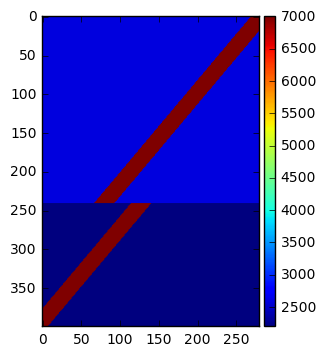

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import *
def displaySliceFromBlock(model, dir, x):
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    if (dir=='x'):
        slice = np.squeeze(model[:,x,:])
    elif (dir=='y'):
        slice = np.squeeze(model[:,:,x])
    else:
        slice = np.squeeze(model[x,:,:])
    
    im = ax.imshow(slice)
    fig.colorbar(im, cax=cax, orientation='vertical')
    plt.show()

f = lambda n: displaySliceFromBlock(model, 'z', n)
interact(f, n=(0,400))

NameError: global name 'filename_stub' is not defined

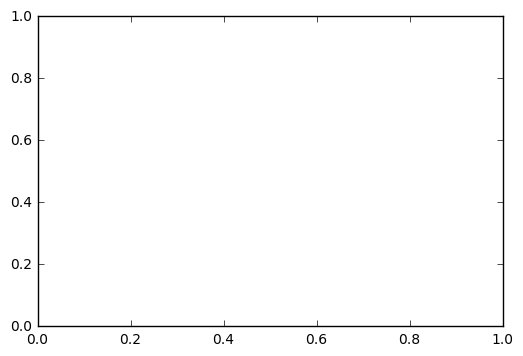

In [9]:


if not os.path.exists('data_'+model_name):
    os.makedirs('data_'+model_name)
    
filename_stub = 'data_'+model_name+'/'+model_name+'_'
            
extractSlicesFromBlock(model, (25,25), filename_stub)            

todo
 - [x] generate a single slice model
 - [x] make it the right size
 - [ ] get variabiity into models using the pynoddy stochastics / . uncertainty gubbins
 - [ ] batch process -  makes 1000's
 - [x] ascii to binary conversion script, to get the models into su
 - [x] visualise a model in a notebook